<a href="https://www.kaggle.com/code/biocanter/top60-with-7-new-features-creation-elastic-net?scriptVersionId=99680600" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
####impport data
train = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
test1 = "../input/house-prices-advanced-regression-techniques/test.csv"
test = pd.read_csv(test1, index_col='Id')

In [3]:
###if we check the categorical data we can realize some categorical data are actually numerical data
qual_dict = {"na": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
train['ExterQual']=train['ExterQual'].fillna("na")
train['ExterCond']=train['ExterCond'].fillna("na")
train['BsmtCond']=train['BsmtCond'].fillna("na")
train['BsmtQual']=train['BsmtQual'].fillna("na")
train['KitchenQual']=train['KitchenQual'].fillna("na")
train['GarageQual']=train['GarageQual'].fillna("na")
train['GarageCond']=train['GarageCond'].fillna("na")
train['FireplaceQu']=train['FireplaceQu'].fillna("na")

####
train["ExterQual"] = train["ExterQual"].map(qual_dict)
train["ExterCond"] = train["ExterCond"].map(qual_dict)
train["BsmtCond"] = train["BsmtCond"].map(qual_dict)
train["BsmtQual"] = train["BsmtQual"].map(qual_dict)
train["KitchenQual"] = train["KitchenQual"].map(qual_dict)
train["GarageQual"] = train["GarageQual"].map(qual_dict)
train["GarageCond"] = train["GarageCond"].map(qual_dict)
train["FireplaceQu"] = train["FireplaceQu"].map(qual_dict)

In [4]:
###check train the data
####train misssing data
a=train.isna().sum()
b=train.columns
for h in range(0, len(a)):
    if a[h]>0:
        print (b[h]+":"+str(a[h])) 

LotFrontage:259
Alley:1369
MasVnrType:8
MasVnrArea:8
BsmtExposure:38
BsmtFinType1:37
BsmtFinType2:38
Electrical:1
GarageType:81
GarageYrBlt:81
GarageFinish:81
PoolQC:1453
Fence:1179
MiscFeature:1406


In [5]:
####numerical feature
numericvar=train.select_dtypes(include=['int64', 'float64']).columns.tolist()
missing=[]
print (numericvar)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


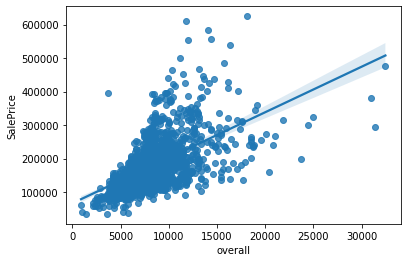

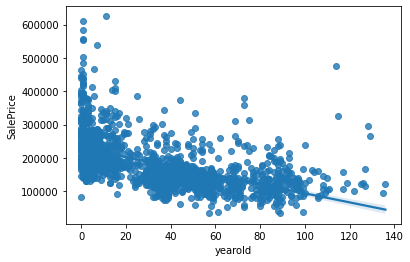

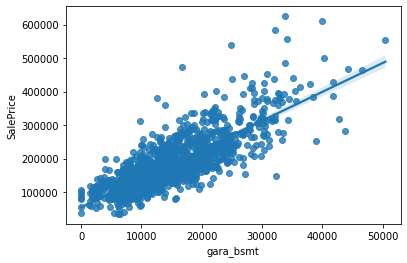

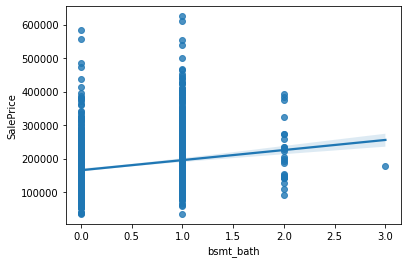

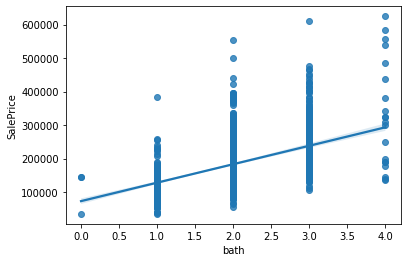

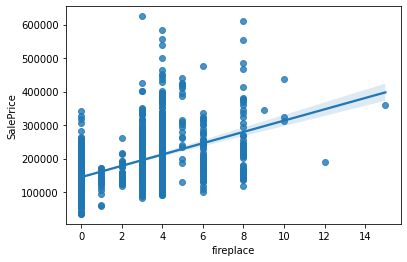

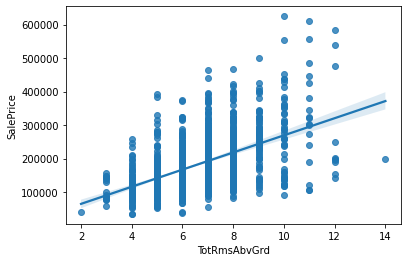

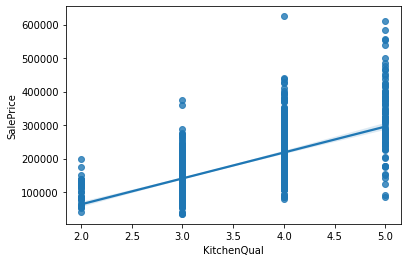

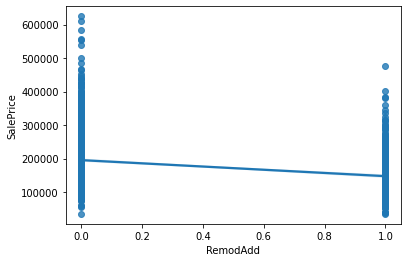

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, skew 
from scipy import stats
from scipy.special import boxcox1p
###Feature optimization & Engineering 
###removing outliers .- ref.- almost all the notebooks
train = train[train.GrLivArea < 4000]
train.reset_index(drop=True, inplace=True)
###create new features
train['overall']=train['GrLivArea']*train['OverallCond']
####when you want to buy a house, one of the most important features is the house year old
train['yearold'] = train['YrSold'] - train['YearBuilt']
####removed add yes or no
train['yearold_add'] = train['YrSold'] - train['YearRemodAdd']
train['yearold_add'] = train['yearold'] - train['yearold_add']
RemodAdd=[]
for h in range (0, len(train)):
    if train['yearold_add'][h]>2:
        RemodAdd.append(1)
    else:
        RemodAdd.append(0)
train['RemodAdd']=RemodAdd
### next two continuous features (bsmt and garage) have a lot of 0 and I don´t like 0.My intuiton says me, alghoritm neither
train['bsmt']=train['BsmtQual']*train['TotalBsmtSF']*train['BsmtCond']
train['garage']=(train['GarageQual']+train['GarageCond'])*train['GarageArea']
###combine bsmt and garage in order to remove 0
train['gara_bsmt']=train['bsmt']+train['garage']
train['bsmt_bath']= train['BsmtFullBath']+train['BsmtHalfBath']
train['bath']= train['FullBath']+train['HalfBath']
train['fireplace'] = train['Fireplaces'] * train['FireplaceQu']


###plot the new feature
new_features=['overall','yearold','gara_bsmt','bsmt_bath','bath','fireplace','TotRmsAbvGrd','KitchenQual','RemodAdd']
###I have also added TotRmsAbvGrd & KitchenQual
for h in new_features:
    sns.regplot(x = h, y = 'SalePrice' , data = train)
    plt.show()

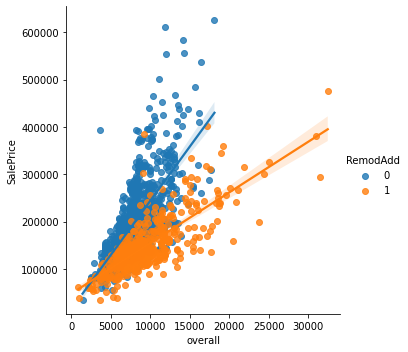

In [7]:
sns.lmplot(x="overall", y="SalePrice", hue="RemodAdd", data=train);
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


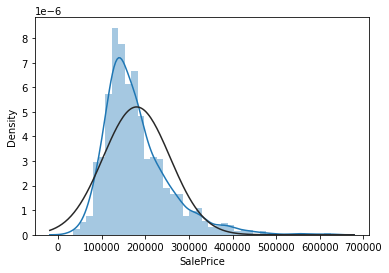

In [8]:
###Feature Engineering
##Log-transformation of skewed target variable
sns.distplot(train['SalePrice'], fit=norm);
plt.show()
train['SalePrice'] = np.log1p(train['SalePrice'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


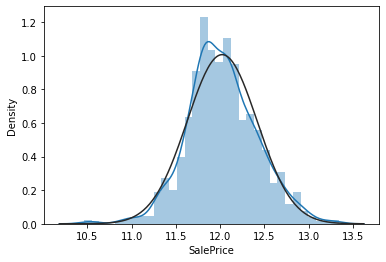

In [9]:
##now we can see our target variable with a normal distribution.
sns.distplot(train['SalePrice'], fit=norm);
plt.show()

In [10]:
# Find skewed numerical features
#ref.-https://www.kaggle.com/code/lavanyashukla01/how-i-made-top-0-3-on-a-kaggle-competition
skew_features = train[new_features].apply(lambda x: skew(x)).sort_values(ascending=False)
print (skew_features)
for h in range (0, len(skew_features)):
    skew_features[h]=abs(skew_features[h])
high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

train[skew_index] = boxcox1p(train[skew_index], 0.37)

skew_features = train[new_features].apply(lambda x: skew(x)).sort_values(ascending=False)
for h in range (0, len(skew_features)):
    skew_features[h]=abs(skew_features[h])
high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index
print("There are {} numerical features with Skew > 0.5 :".format(high_skew.shape[0]))
print (high_skew)

overall         1.772247
gara_bsmt       1.062405
fireplace       0.852948
RemodAdd        0.768093
TotRmsAbvGrd    0.660735
yearold         0.605073
bsmt_bath       0.476188
KitchenQual     0.381040
bath            0.243389
dtype: float64
There are 1 numerical features with Skew > 0.5 :
RemodAdd    0.768093
dtype: float64


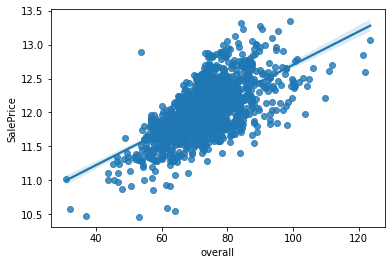

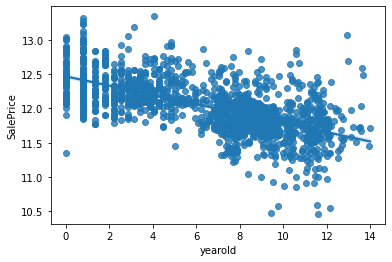

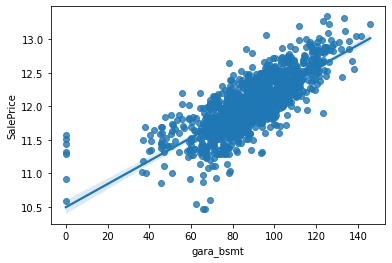

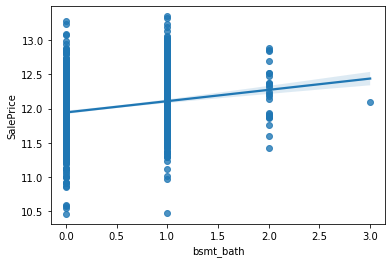

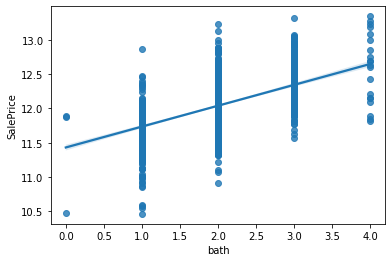

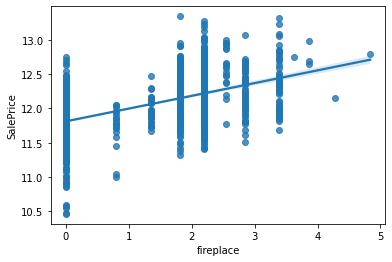

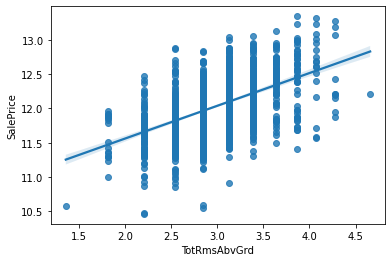

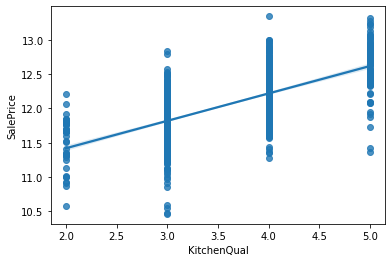

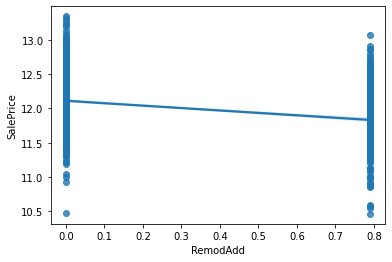

In [11]:
for h in new_features:
    sns.regplot(x = h, y = 'SalePrice' , data = train)
    plt.show()

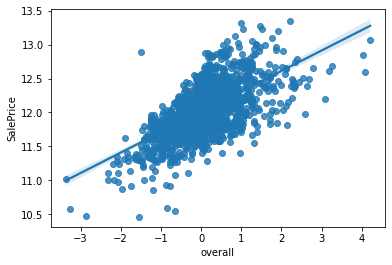

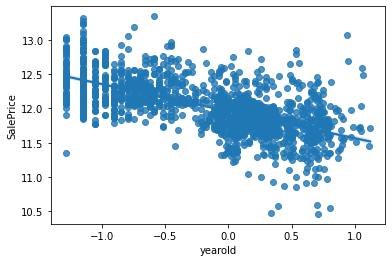

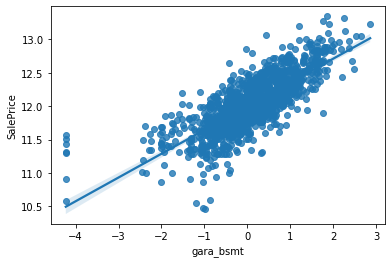

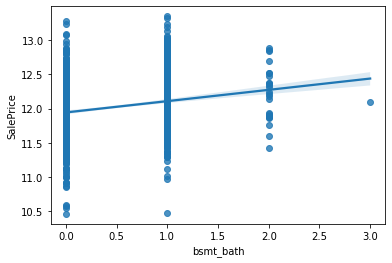

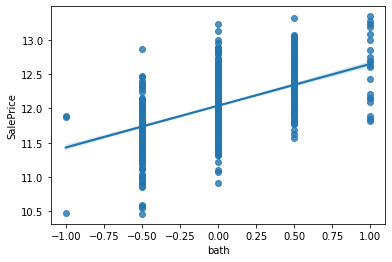

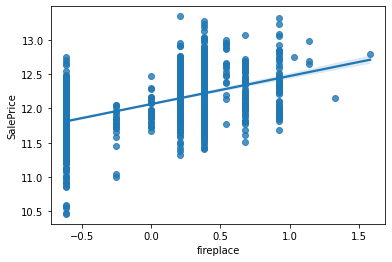

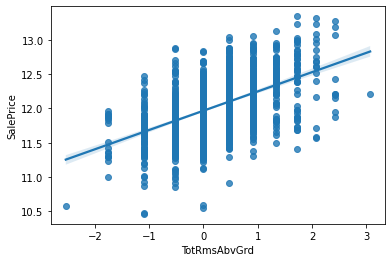

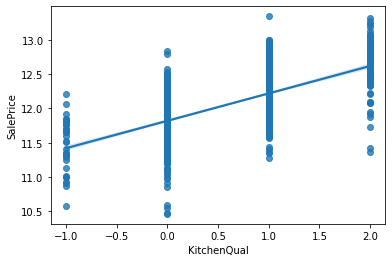

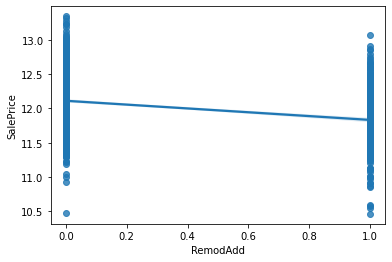

In [12]:
##apply robustscaler
#Scale features using statistics that are robust to outliers.
from sklearn.preprocessing import RobustScaler
trans = RobustScaler()
train[new_features] = trans.fit_transform(train[new_features])
for h in new_features:
    sns.regplot(x = h, y = 'SalePrice' , data = train)
    plt.show()

Training score: 0.8701681555197626
Test score: 0.8852614888681585
MSE: 0.017342377780537023


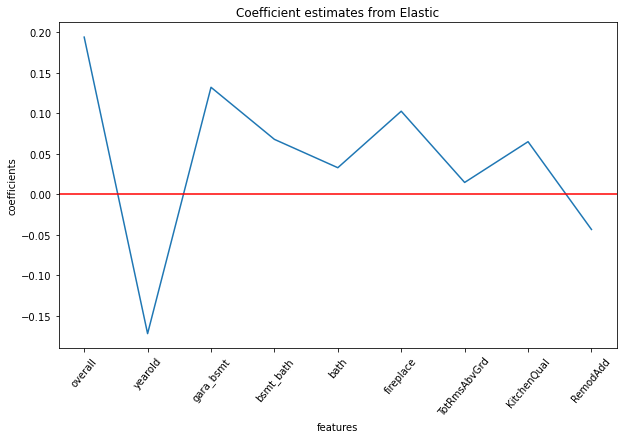

In [13]:
##split into train and test data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
import math
X=train[new_features]
y=train['SalePrice']
train_X, val_X, train_y, val_y = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)
###elastic model


elasticnet = ElasticNet(alpha=0.001, l1_ratio=0.31)

elasticnet.fit(train_X, train_y)

print('Training score: {}'.format(elasticnet.score(train_X, train_y)))
print('Test score: {}'.format(elasticnet.score(val_X, val_y)))

y_pred = elasticnet.predict(val_X)
mse = mean_squared_error(val_y, y_pred)
rmse = math.sqrt(mse)
print('MSE: {}'.format(mse))
###########
feature_names=X.columns
# Creating an object containing the best Elastic regression model

# Extracting the coefficient estimates for all ten features
elastic_coeffs = elasticnet.coef_
# plotting the coefficient estimates for all ten features
plt.figure(figsize=(10,6))
plt.plot(range(len(feature_names)),elastic_coeffs)
plt.axhline(0, color='r', linestyle='solid')
plt.xticks(range(len(feature_names)),feature_names,rotation=50)
plt.title("Coefficient estimates from Elastic")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.show()

In [14]:
###model optimization
# use automatically configured elastic net algorithm
from sklearn.linear_model import ElasticNetCV
from numpy import arange
from pandas import read_csv
from sklearn.model_selection import RepeatedKFold
###
import warnings
warnings.filterwarnings("ignore")
# load the dataset
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define model
ratios = arange(0, 1, 0.01)
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
model = ElasticNetCV(l1_ratio=ratios, alphas=alphas, cv=cv, n_jobs=-1)
# fit model
model.fit(X, y)
# summarize chosen configuration
print('alpha: %f' % model.alpha_)
print('l1_ratio_: %f' % model.l1_ratio_)

alpha: 0.001000
l1_ratio_: 0.000000


Training score: 0.8701681555197626
Test score: 0.8852614888681585
MSE: 0.017342377780537023


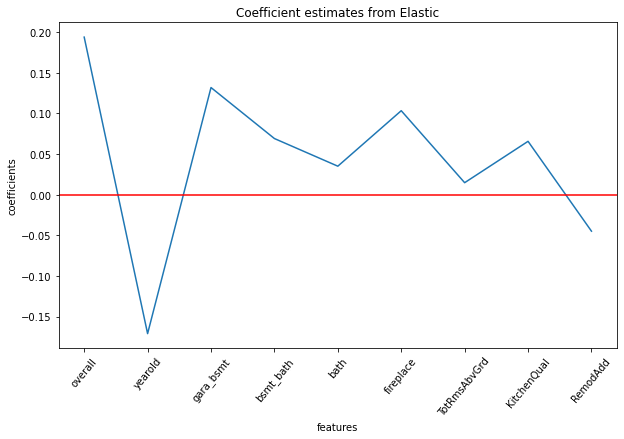

In [15]:
####use last configuration 
#alpha: 0.010000
#l1_ratio_: 0.000000
best_elastic_model = ElasticNet(alpha=0.001000, l1_ratio=0)
best_elastic_model.fit(train_X, train_y)
print('Training score: {}'.format(elasticnet.score(train_X, train_y)))
print('Test score: {}'.format(elasticnet.score(val_X, val_y)))
y_pred = elasticnet.predict(val_X)
mse = mean_squared_error(val_y, y_pred)
rmse = math.sqrt(mse)
print('MSE: {}'.format(mse))
#######
feature_names=X.columns
# Extracting the coefficient estimates for all ten features
best_elastic_coeffs = best_elastic_model.coef_
# plotting the coefficient estimates for all ten features
plt.figure(figsize=(10,6))
plt.plot(range(len(feature_names)),best_elastic_coeffs)
plt.axhline(0, color='r', linestyle='solid')
plt.xticks(range(len(feature_names)),feature_names,rotation=50)
plt.title("Coefficient estimates from Elastic")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.show()

In [16]:
###check the data
####misssing data
a=test.isna().sum()
b=test.columns
for h in range(0, len(a)):
    if a[h]>0:
        print (b[h]+":"+str(a[h]))

MSZoning:4
LotFrontage:227
Alley:1352
Utilities:2
Exterior1st:1
Exterior2nd:1
MasVnrType:16
MasVnrArea:15
BsmtQual:44
BsmtCond:45
BsmtExposure:44
BsmtFinType1:42
BsmtFinSF1:1
BsmtFinType2:42
BsmtFinSF2:1
BsmtUnfSF:1
TotalBsmtSF:1
BsmtFullBath:2
BsmtHalfBath:2
KitchenQual:1
Functional:2
FireplaceQu:730
GarageType:76
GarageYrBlt:78
GarageFinish:78
GarageCars:1
GarageArea:1
GarageQual:78
GarageCond:78
PoolQC:1456
Fence:1169
MiscFeature:1408
SaleType:1


In [17]:
####input test missing value
test['TotalBsmtSF']=test['TotalBsmtSF'].fillna(0)
test['GarageCars']=test['GarageCars'].fillna(0)
test['GarageArea']=test['GarageArea'].fillna(0)
###transform categorical data into numerical data
test['ExterQual']=test['ExterQual'].fillna("na")
test['ExterCond']=test['ExterCond'].fillna("na")
test['BsmtCond']=test['BsmtCond'].fillna("na")
test['BsmtQual']=test['BsmtQual'].fillna("na")
test['KitchenQual']=test['KitchenQual'].fillna("na")
test['GarageQual']=test['GarageQual'].fillna("na")
test['GarageCond']=test['GarageCond'].fillna("na")
test['FireplaceQu']=test['FireplaceQu'].fillna("na")
####
test["ExterQual"] = test["ExterQual"].map(qual_dict)
test["ExterCond"] = test["ExterCond"].map(qual_dict)
test["BsmtCond"] = test["BsmtCond"].map(qual_dict)
test["BsmtQual"] = test["BsmtQual"].map(qual_dict)
test["KitchenQual"] = test["KitchenQual"].map(qual_dict)
test["GarageQual"] = test["GarageQual"].map(qual_dict)
test["GarageCond"] = test["GarageCond"].map(qual_dict)
test["FireplaceQu"] = test["FireplaceQu"].map(qual_dict)
####missing data
test['BsmtFullBath']=test['BsmtFullBath'].fillna(int(0))
test['BsmtHalfBath']=test['BsmtHalfBath'].fillna(int(0))
###Feature optimization & Engineering 

test['overall']=test['GrLivArea']*test['OverallCond']
test['yearold'] = test['YrSold'] - test['YearBuilt']
####removed add yes or no
test['yearold_add'] = test['YrSold'] - test['YearRemodAdd']
test['yearold_add'] = test['yearold'] - test['yearold_add']
RemodAdd=[]
for h in range (1461, 2920):
    if test['yearold_add'][h]>2:
        RemodAdd.append(1)
    else:
        RemodAdd.append(0)
test['RemodAdd']=RemodAdd
test['bsmt']=test['BsmtQual']*test['TotalBsmtSF']*test['BsmtCond']
test['garage']=(test['GarageQual']+test['GarageCond'])*test['GarageArea']
test['gara_bsmt']=test['bsmt']+test['garage']
test['bsmt_bath']= test['BsmtFullBath']+test['BsmtHalfBath']
test['bath']= test['FullBath']+test['HalfBath']
test['fireplace'] = test['Fireplaces'] * test['FireplaceQu']
#train['total']= train['overall']+train['bsmt']+train['garage']

#skew_cal= [ 'bsmt_bath','overall','bath','KitchenQual','fireplace','TotRmsAbvGrd']



# Find skewed numerical features
skew_features = test[new_features].apply(lambda x: skew(x)).sort_values(ascending=False)
print (skew_features)
for h in range (0, len(skew_features)):
    skew_features[h]=abs(skew_features[h])
high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

test[skew_index] = boxcox1p(test[skew_index], 0.37)

skew_features = test[new_features].apply(lambda x: skew(x)).sort_values(ascending=False)
for h in range (0, len(skew_features)):
    skew_features[h]=abs(skew_features[h])
high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index
print("There are {} numerical features with Skew > 0.5 :".format(high_skew.shape[0]))
print (high_skew)
####robust scaler
test[new_features] = trans.fit_transform(test[new_features])  

gara_bsmt       1.487488
overall         1.382376
fireplace       0.977219
RemodAdd        0.886096
TotRmsAbvGrd    0.841731
yearold         0.589056
bath            0.583500
bsmt_bath       0.541623
KitchenQual     0.387356
dtype: float64
There are 1 numerical features with Skew > 0.5 :
RemodAdd    0.886096
dtype: float64


In [18]:
####fit the model with all train data and predict price with test data
elasticnet.fit(X, y)
final_test=test[new_features]
test_pred = elasticnet.predict(final_test)
###inverse of log1p
test_pred=np.expm1(test_pred)

In [19]:
output = pd.DataFrame({'Id': test.index,
                       'SalePrice': test_pred})
output.to_csv('submission.csv', index=False)
output
#test_pred

,Id,SalePrice
0,1461,121742.313280
1,1462,160920.445380
2,1463,191318.351203
3,1464,217585.373032
4,1465,170589.990370
...,...,...
1454,2915,127497.342096
1455,2916,116086.628821
1456,2917,174893.634185
1457,2918,137245.689687
